In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pmdarima


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt
%matplotlib inline

from pmdarima.arima import auto_arima

In [2]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6

In [58]:
# Lendo o arquivo CSV
dados_agrupados = pd.read_csv('C:/poli/eEDB-002 Análises preditivas/trabalho/base final/dados_agrupados.csv', usecols=['id_subsistema', 'din_instante', 'val_cargaenergiamwmed'])

#Separando os dados de consumo por região em diferentes DataFrames
df_norte = dados_agrupados.loc[dados_agrupados['id_subsistema']=='N']
df_nordeste = dados_agrupados.loc[dados_agrupados['id_subsistema']=='NE']
df_sul = dados_agrupados.loc[dados_agrupados['id_subsistema']=='S']
df_sudeste_centro_oeste = dados_agrupados.loc[dados_agrupados['id_subsistema']=='SE']

In [4]:
df_norte

,id_subsistema,din_instante,val_cargaenergiamwmed
0,N,1/1/2000,2243.512500
1,N,1/2/2000,2259.808333
2,N,1/3/2000,2407.429167
3,N,1/4/2000,2404.216667
4,N,1/5/2000,2439.650000
...,...,...,...
9023,N,9/14/2024,8463.487083
9024,N,9/15/2024,8086.252458
9025,N,9/16/2024,8834.148292
9026,N,9/17/2024,8916.103083


In [5]:
df_norte.describe()

,val_cargaenergiamwmed
count,9028.000000
mean,4400.430518
std,1446.502699
min,1852.020833
25%,3249.346250
50%,4086.213750
75%,5454.696375
max,8916.103083


In [6]:
df_norte.drop(columns=['id_subsistema'], inplace=True)

C:\Users\leander.silveira\AppData\Local\Temp\ipykernel_16372\945717494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norte.drop(columns=['id_subsistema'], inplace=True)


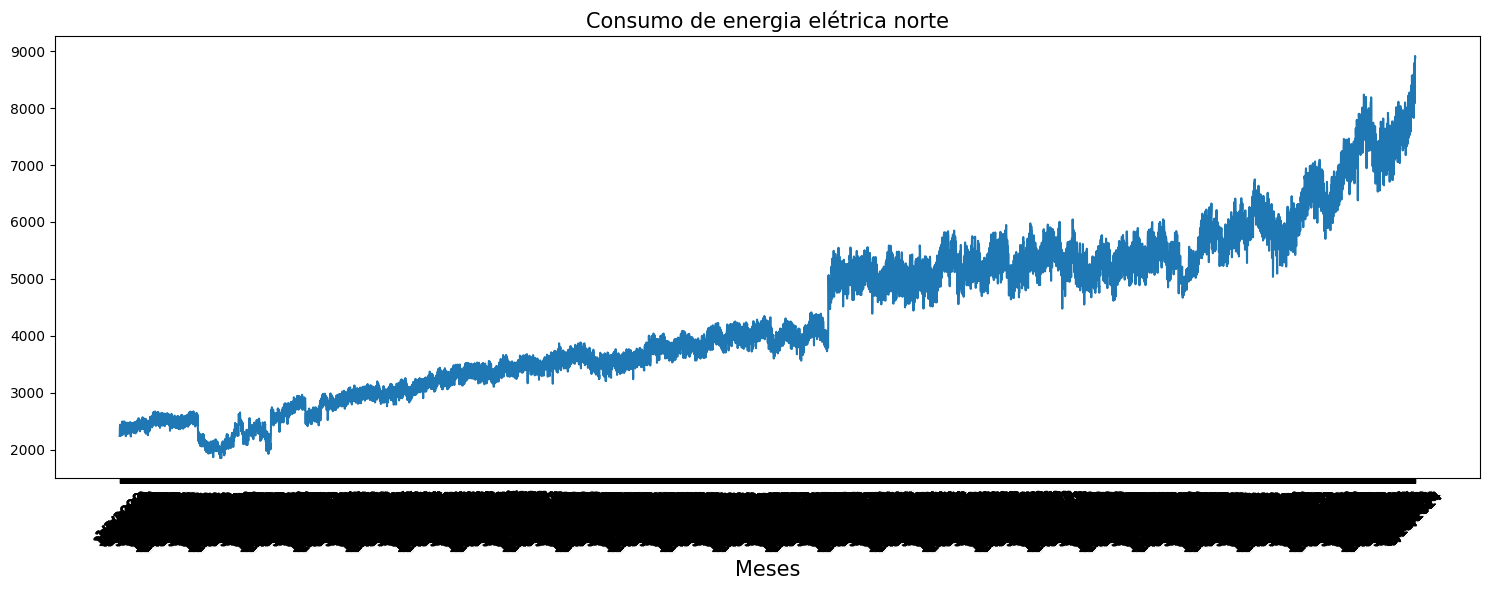

In [7]:
plt.plot(df_norte['din_instante'], df_norte['val_cargaenergiamwmed'])  # Substitua 'data_coluna' e 'consumo' pelos nomes corretos
plt.xlabel('Meses', size=15)
plt.ylabel('')
plt.title('Consumo de energia elétrica norte', size=15)
plt.xticks(rotation=45)  # Para girar as datas no eixo x, se necessário

plt.tight_layout()

plt.show()



In [8]:
df_norte.set_index('din_instante', inplace=True)  # Substitua 'data_coluna' pelo nome da sua coluna de data

In [9]:
stepwise_df_norte=auto_arima(df_norte,start_p=1,start_q=1,max_p=1,max_q=1,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=25.92 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=128183.386, Time=0.31 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=124676.173, Time=4.75 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=7.28 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=128171.499, Time=0.50 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=123100.563, Time=10.34 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=26.31 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=21.61 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=123429.308, Time=3.31 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=29.66 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=121782.731, Time=17.27 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=124676.096, Time=5.00 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=22.81 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=11.68 sec
 ARIMA(0,1,1)(2,1,0)[12] interce

In [10]:
stepwise_df_norte

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [11]:
stepwise_df_norte.aic()

121782.73148136307

In [12]:
df_norte.index = pd.to_datetime(df_norte.index)


In [13]:
print(df_norte.index)


DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12',
               '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16',
               '2024-09-17', '2024-09-18'],
              dtype='datetime64[ns]', name='din_instante', length=9028, freq=None)


In [14]:
train_df_norte = df_norte.loc['2000-01-01':'2024-09-18']
test_df_norte = df_norte.loc['2024-09-19':]


In [15]:
stepwise_df_norte.fit(train_df_norte)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [16]:
future_forecast_df_norte=stepwise_df_norte.predict(n_periods=30)

In [17]:
future_forecast_df_norte

2024-09-19    8653.614973
2024-09-20    8535.135216
2024-09-21    8802.627335
2024-09-22    8693.246730
2024-09-23    8583.518435
2024-09-24    8885.902634
2024-09-25    8897.719902
2024-09-26    8949.374019
2024-09-27    8875.706043
2024-09-28    9049.340923
2024-09-29    8865.552246
2024-09-30    8720.387037
2024-10-01    9000.178088
2024-10-02    8916.588098
2024-10-03    9056.001312
2024-10-04    9013.486985
2024-10-05    9017.416600
2024-10-06    9020.439365
2024-10-07    8865.667665
2024-10-08    9102.915419
2024-10-09    9054.338707
2024-10-10    9292.998942
2024-10-11    9158.173708
2024-10-12    8998.509091
2024-10-13    8861.195786
2024-10-14    8789.254583
2024-10-15    9286.528542
2024-10-16    9314.607168
2024-10-17    9349.173369
2024-10-18    9401.363944
Freq: D, dtype: float64

In [18]:
# Criar o DataFrame
future_forecast_df_norte = pd.DataFrame(list(future_forecast_df_norte.items()), columns=['Date', 'Forecast'])
future_forecast_df_norte['Date'] = pd.to_datetime(future_forecast_df_norte['Date'])
future_forecast_df_norte.set_index('Date', inplace=True)

In [19]:
future_forecast_df_norte

,Forecast
Date,
2024-09-19,8653.614973
2024-09-20,8535.135216
2024-09-21,8802.627335
2024-09-22,8693.246730
2024-09-23,8583.518435
2024-09-24,8885.902634
2024-09-25,8897.719902
2024-09-26,8949.374019
2024-09-27,8875.706043


<Figure size 2000x500 with 0 Axes>

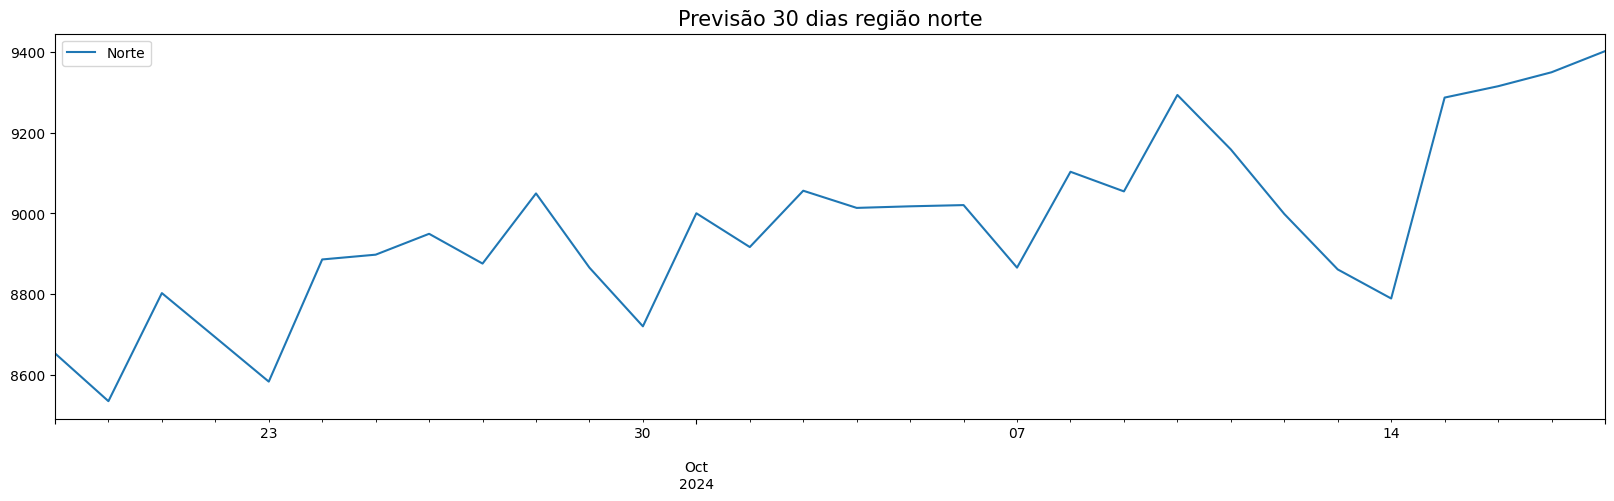

In [20]:
plt.figure(figsize=(20, 5))
future_forecast_df_norte.plot(figsize=(20, 5))
plt.xlabel('')
plt.title('Previsão 30 dias região norte', size=15)
plt.legend(['Norte'])  # ajuste a legenda conforme necessário
plt.show()


<Figure size 2000x500 with 0 Axes>

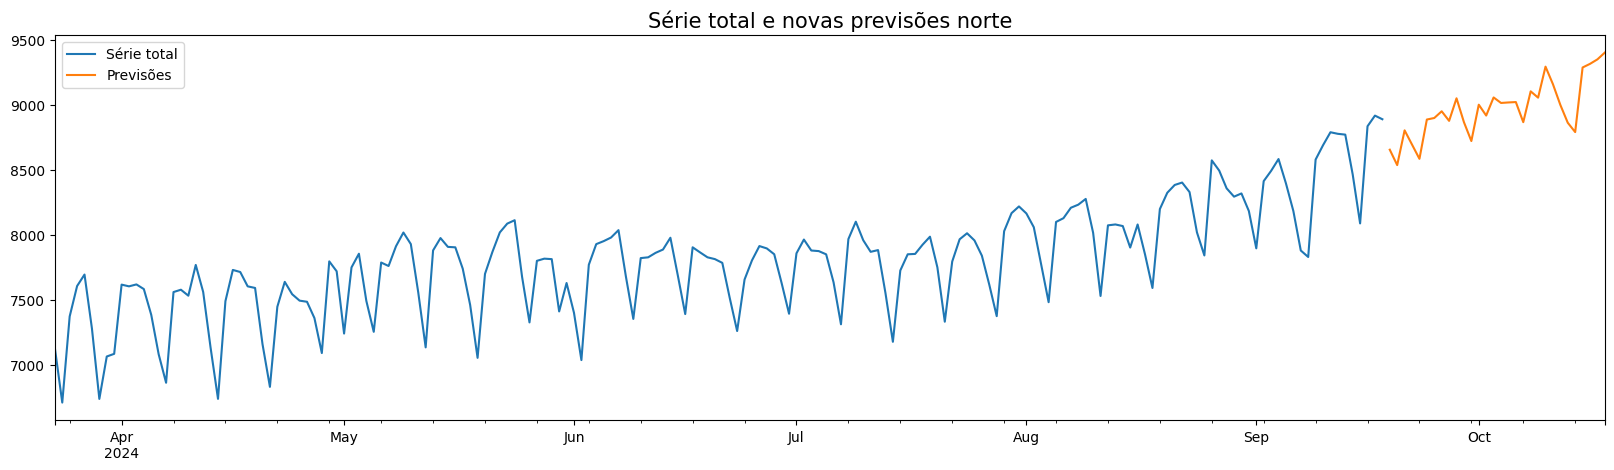

In [36]:
plt.figure(figsize=(20,5))
pd.concat([df_norte[-180:],future_forecast_df_norte],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Série total e novas previsões norte',size=15)
plt.legend(['Série total','Previsões'], loc='upper left')
plt.show();

DF_NORDESTE

In [21]:
df_nordeste

,id_subsistema,din_instante,val_cargaenergiamwmed
9028,NE,1/1/2000,4646.370833
9029,NE,1/2/2000,4895.720833
9030,NE,1/3/2000,5736.008333
9031,NE,1/4/2000,5783.770833
9032,NE,1/5/2000,5753.120833
...,...,...,...
18051,NE,9/14/2024,12523.333920
18052,NE,9/15/2024,11940.293830
18053,NE,9/16/2024,13222.085580
18054,NE,9/17/2024,13498.641330


In [22]:
df_nordeste.describe()

,val_cargaenergiamwmed
count,9028.000000
mean,8653.272971
std,2170.312080
min,3904.475000
25%,6796.103541
50%,8637.363170
75%,10322.137615
max,14570.946290


In [23]:
df_nordeste.drop(columns=['id_subsistema'], inplace=True)

C:\Users\leander.silveira\AppData\Local\Temp\ipykernel_16372\3196068819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nordeste.drop(columns=['id_subsistema'], inplace=True)


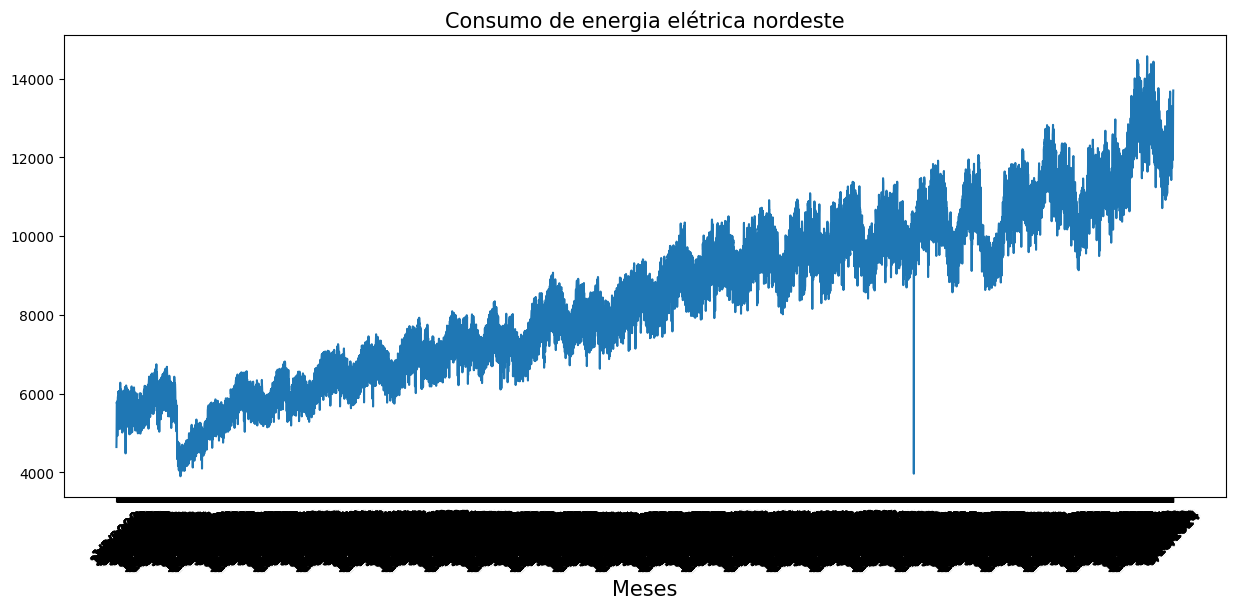

In [45]:
plt.plot(df_nordeste['din_instante'], df_nordeste['val_cargaenergiamwmed'])  # Substitua 'data_coluna' e 'consumo' pelos nomes corretos
plt.xlabel('Meses', size=15)
plt.ylabel('')
plt.title('Consumo de energia elétrica nordeste', size=15)
plt.xticks(rotation=45)  # Para girar as datas no eixo x, se necessário
plt.show()

In [24]:
df_nordeste.set_index('din_instante', inplace=True)  # Substitua 'data_coluna' pelo nome da sua coluna de data

In [25]:
stepwise_df_nordeste=auto_arima(df_nordeste,start_p=1,start_q=1,max_p=1,max_q=1,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=19.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=146675.642, Time=0.26 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=143164.095, Time=4.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=9.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=146668.953, Time=0.42 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=141421.734, Time=9.26 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=32.16 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=12.68 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=141752.280, Time=3.62 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=40.13 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=139590.793, Time=15.71 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=143158.735, Time=5.18 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=43.76 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=14.18 sec
 ARIMA(0,1,1)(2,1,0)[12] intercep

In [48]:
stepwise_df_nordeste

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [26]:
stepwise_df_nordeste.aic()

139590.79303146843

In [27]:
df_nordeste.index = pd.to_datetime(df_nordeste.index)

In [28]:
print(df_nordeste.index)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12',
               '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16',
               '2024-09-17', '2024-09-18'],
              dtype='datetime64[ns]', name='din_instante', length=9028, freq=None)


In [29]:
train_df_nordeste = df_nordeste.loc['2000-01-01':'2024-09-18']
test_df_nordeste = df_nordeste.loc['2024-09-19':]

In [30]:
stepwise_df_nordeste.fit(train_df_nordeste)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [31]:
future_forecast_df_nordeste=stepwise_df_nordeste.predict(n_periods=30)

In [32]:
future_forecast_df_nordeste

2024-09-19    13255.462063
2024-09-20    13015.009342
2024-09-21    13274.280302
2024-09-22    12933.203056
2024-09-23    12411.902479
2024-09-24    13051.663408
2024-09-25    13232.998955
2024-09-26    13374.519261
2024-09-27    13321.818236
2024-09-28    13674.866094
2024-09-29    13298.131776
2024-09-30    12849.378761
2024-10-01    13313.873179
2024-10-02    13209.006124
2024-10-03    13440.711253
2024-10-04    13270.685476
2024-10-05    13098.605243
2024-10-06    12792.080880
2024-10-07    12399.209811
2024-10-08    13110.355579
2024-10-09    13125.946398
2024-10-10    13543.453825
2024-10-11    13461.927436
2024-10-12    13438.585466
2024-10-13    12900.944622
2024-10-14    12554.332721
2024-10-15    13435.841825
2024-10-16    13459.339951
2024-10-17    13175.597515
2024-10-18    13167.587187
Freq: D, dtype: float64

In [33]:
# Criar o DataFrame
future_forecast_df_nordeste = pd.DataFrame(list(future_forecast_df_nordeste.items()), columns=['Date', 'Forecast'])
future_forecast_df_nordeste['Date'] = pd.to_datetime(future_forecast_df_nordeste['Date'])
future_forecast_df_nordeste.set_index('Date', inplace=True)

<Figure size 2000x500 with 0 Axes>

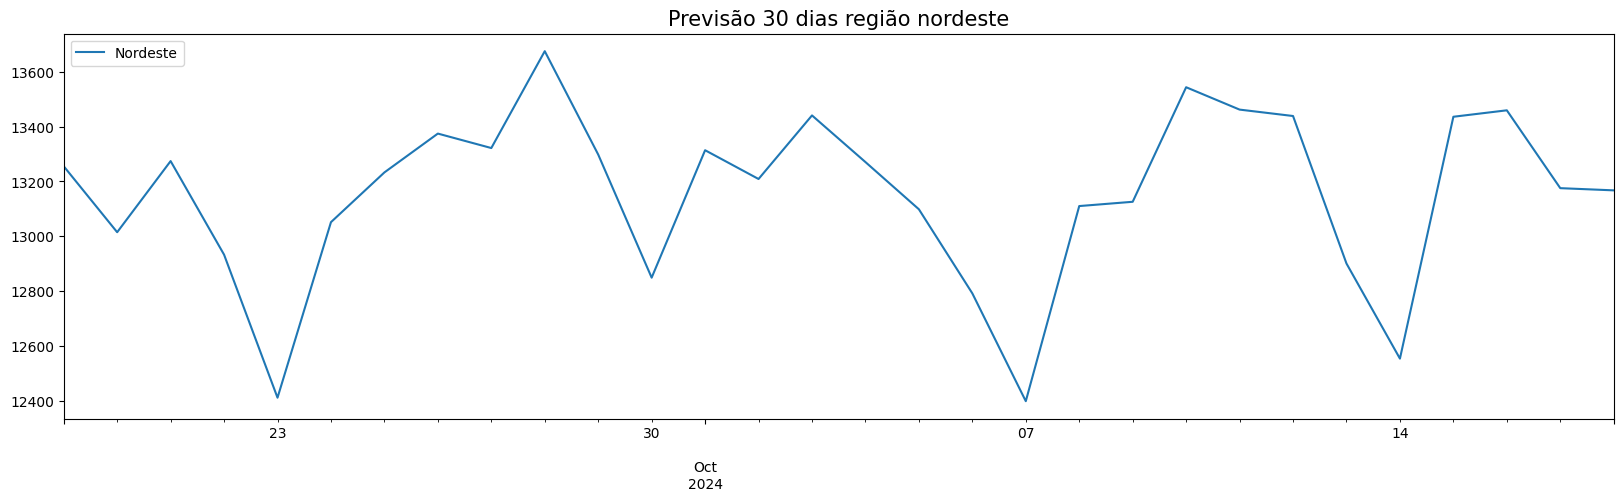

In [39]:
plt.figure(figsize=(20, 5))
future_forecast_df_nordeste.plot(figsize=(20, 5))
plt.xlabel('')
plt.title('Previsão 30 dias região nordeste', size=15)
plt.legend(['Nordeste'], loc='upper left')  # ajuste a legenda conforme necessário
plt.show()

<Figure size 2000x500 with 0 Axes>

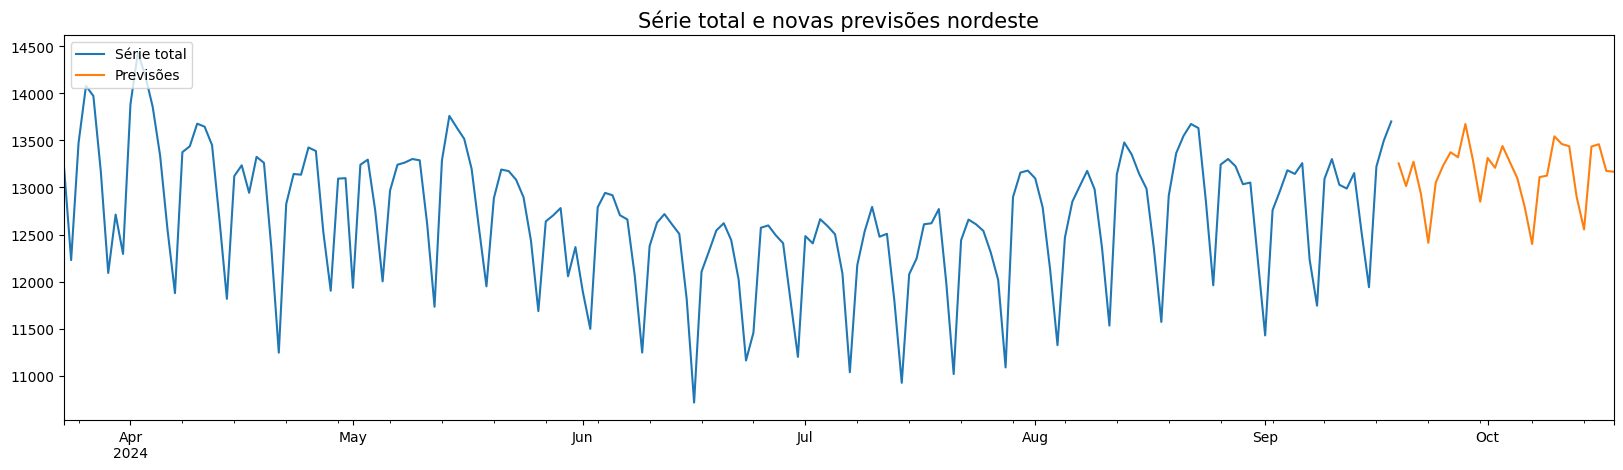

In [58]:
plt.figure(figsize=(20,5))
pd.concat([df_nordeste[-180:],future_forecast_df_nordeste],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Série total e novas previsões nordeste',size=15)
plt.legend(['Série total','Previsões'], loc='upper left')
plt.show();

DF_SUL

In [34]:
df_sul

,id_subsistema,din_instante,val_cargaenergiamwmed
18056,S,1/1/2000,4800.650000
18057,S,1/2/2000,4899.800000
18058,S,1/3/2000,6261.554167
18059,S,1/4/2000,6733.741667
18060,S,1/5/2000,6961.170833
...,...,...,...
27079,S,9/14/2024,11455.823080
27080,S,9/15/2024,9985.410292
27081,S,9/16/2024,12189.837290
27082,S,9/17/2024,12443.345290


In [35]:
df_sul.describe()

,val_cargaenergiamwmed
count,9028.000000
mean,9528.975611
std,2314.708228
min,4465.691251
25%,7652.589269
50%,9286.596688
75%,11232.438290
max,18150.928290


In [36]:
df_sul.drop(columns=['id_subsistema'], inplace=True)

C:\Users\leander.silveira\AppData\Local\Temp\ipykernel_16372\163654041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sul.drop(columns=['id_subsistema'], inplace=True)


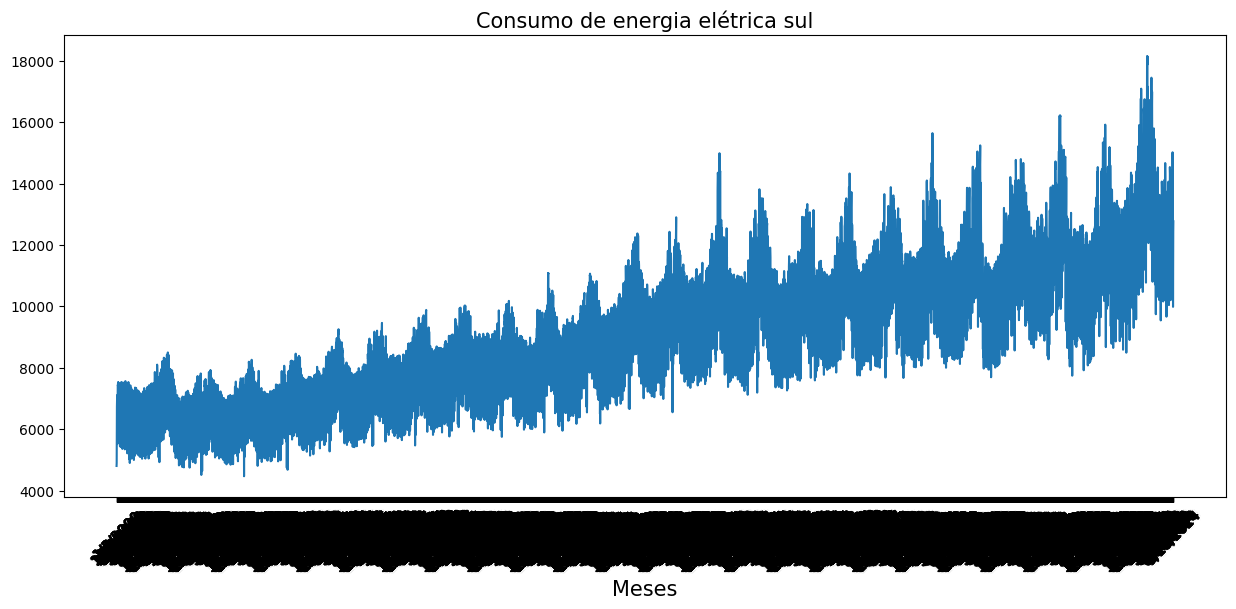

In [37]:
plt.plot(df_sul['din_instante'], df_sul['val_cargaenergiamwmed'])  # Substitua 'data_coluna' e 'consumo' pelos nomes corretos
plt.xlabel('Meses', size=15)
plt.ylabel('')
plt.title('Consumo de energia elétrica sul', size=15)
plt.xticks(rotation=45)  # Para girar as datas no eixo x, se necessário
plt.show()

In [38]:
df_sul.set_index('din_instante', inplace=True)  # Substitua 'data_coluna' pelo nome da sua coluna de data

In [39]:
stepwise_df_sul=auto_arima(df_sul,start_p=1,start_q=1,max_p=1,max_q=1,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=13.68 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=162286.943, Time=0.27 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=158442.260, Time=7.76 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=8.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=162287.112, Time=0.37 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=156607.509, Time=21.82 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=31.34 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=12.56 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=156768.847, Time=4.50 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=36.79 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=inf, Time=23.67 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=156609.507, Time=30.11 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]          
Total fit time: 191.128 seconds


In [73]:
stepwise_df_sul

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [40]:
stepwise_df_sul.aic()

156607.50870524862

In [41]:
df_sul.index = pd.to_datetime(df_sul.index)

In [42]:
print(df_sul.index)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12',
               '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16',
               '2024-09-17', '2024-09-18'],
              dtype='datetime64[ns]', name='din_instante', length=9028, freq=None)


In [43]:
train_df_sul = df_sul.loc['2000-01-01':'2024-09-18']
test_df_sul = df_sul.loc['2024-09-19':]

In [44]:
stepwise_df_sul.fit(train_df_sul)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [45]:
future_forecast_df_sul=stepwise_df_sul.predict(n_periods=30)

In [47]:
future_forecast_df_sul

2024-09-19    13241.758550
2024-09-20    13348.528041
2024-09-21    13854.660814
2024-09-22    13252.770016
2024-09-23    12647.123624
2024-09-24    13882.080823
2024-09-25    13155.652046
2024-09-26    13633.357695
2024-09-27    13724.463602
2024-09-28    13938.127321
2024-09-29    12781.045460
2024-09-30    11845.026782
2024-10-01    12594.118223
2024-10-02    12616.175821
2024-10-03    13990.604044
2024-10-04    14166.617236
2024-10-05    14125.553698
2024-10-06    13455.939881
2024-10-07    12308.641588
2024-10-08    12826.997673
2024-10-09    12624.394457
2024-10-10    13648.724482
2024-10-11    13387.702445
2024-10-12    12990.233483
2024-10-13    12379.537598
2024-10-14    12166.077876
2024-10-15    14261.592196
2024-10-16    14471.128351
2024-10-17    14294.231771
2024-10-18    14503.449771
Freq: D, dtype: float64

In [48]:
# Criar o DataFrame
future_forecast_df_sul = pd.DataFrame(list(future_forecast_df_sul.items()), columns=['Date', 'Forecast'])
future_forecast_df_sul['Date'] = pd.to_datetime(future_forecast_df_sul['Date'])
future_forecast_df_sul.set_index('Date', inplace=True)

In [49]:
future_forecast_df_sul

,Forecast
Date,
2024-09-19,13241.758550
2024-09-20,13348.528041
2024-09-21,13854.660814
2024-09-22,13252.770016
2024-09-23,12647.123624
2024-09-24,13882.080823
2024-09-25,13155.652046
2024-09-26,13633.357695
2024-09-27,13724.463602


<Figure size 2000x500 with 0 Axes>

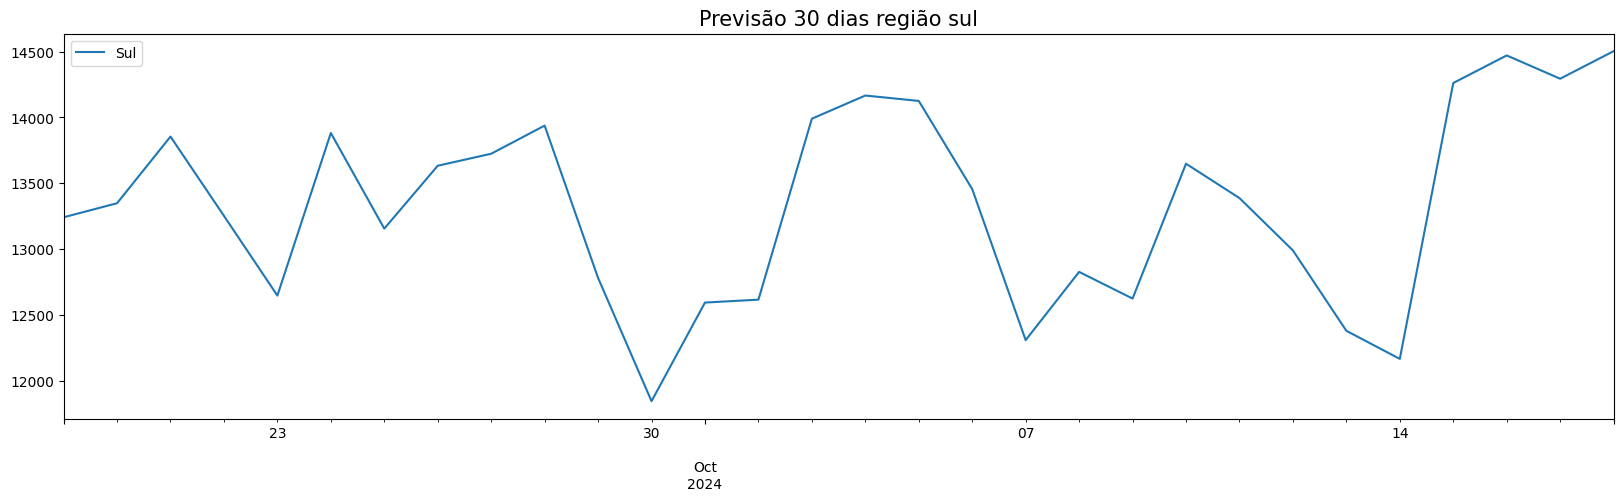

In [50]:
plt.figure(figsize=(20, 5))
future_forecast_df_sul.plot(figsize=(20, 5))
plt.xlabel('')
plt.title('Previsão 30 dias região sul', size=15)
plt.legend(['Sul'])  # ajuste a legenda conforme necessário
plt.show()


<Figure size 2000x500 with 0 Axes>

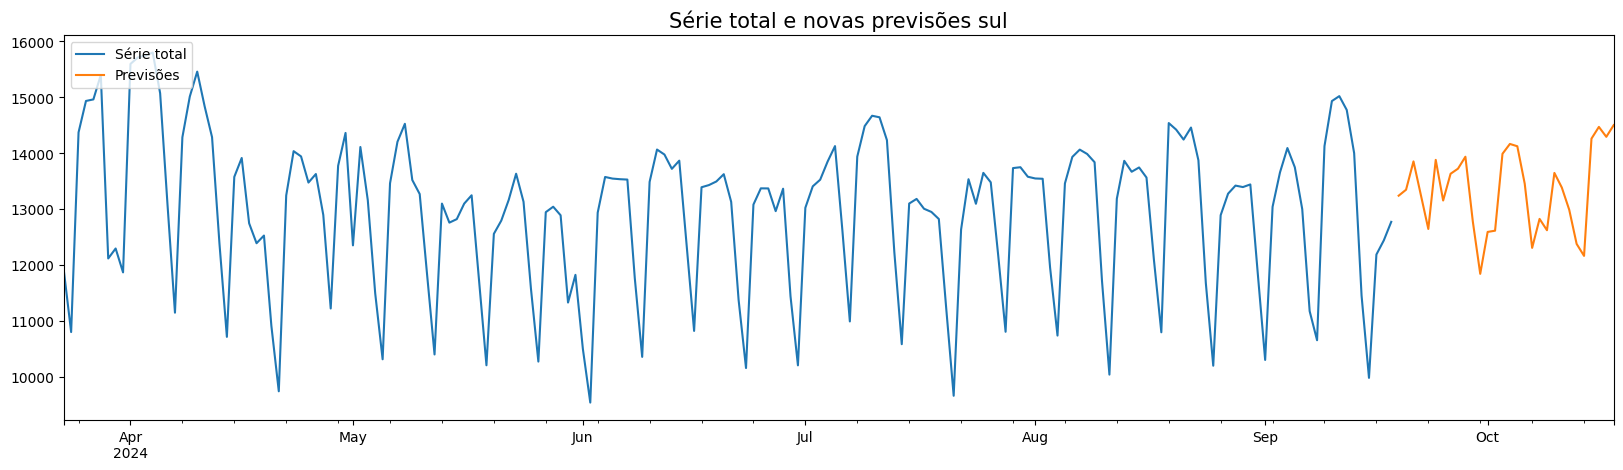

In [51]:
plt.figure(figsize=(20,5))
pd.concat([df_sul[-180:],future_forecast_df_sul],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Série total e novas previsões sul',size=15)
plt.legend(['Série total','Previsões'], loc='upper left')
plt.show();

DF_SUDESTE_CENTRO_OESTE

In [59]:
df_sudeste_centro_oeste

,id_subsistema,din_instante,val_cargaenergiamwmed
27084,SE,1/1/2000,19045.99583
27085,SE,1/2/2000,19398.02500
27086,SE,1/3/2000,23061.74583
27087,SE,1/4/2000,24228.24167
27088,SE,1/5/2000,24807.93750
...,...,...,...
36107,SE,9/14/2024,45489.33208
36108,SE,9/15/2024,40416.83958
36109,SE,9/16/2024,45377.67450
36110,SE,9/17/2024,44993.84921


In [60]:
df_sudeste_centro_oeste.describe()

,val_cargaenergiamwmed
count,9028.000000
mean,33277.237051
std,6091.683904
min,15878.385830
25%,28690.965938
50%,33397.198750
75%,37471.167347
max,53717.617170


In [61]:
df_sudeste_centro_oeste.drop(columns=['id_subsistema'], inplace=True)

C:\Users\leander.silveira\AppData\Local\Temp\ipykernel_16372\3137063485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sudeste_centro_oeste.drop(columns=['id_subsistema'], inplace=True)


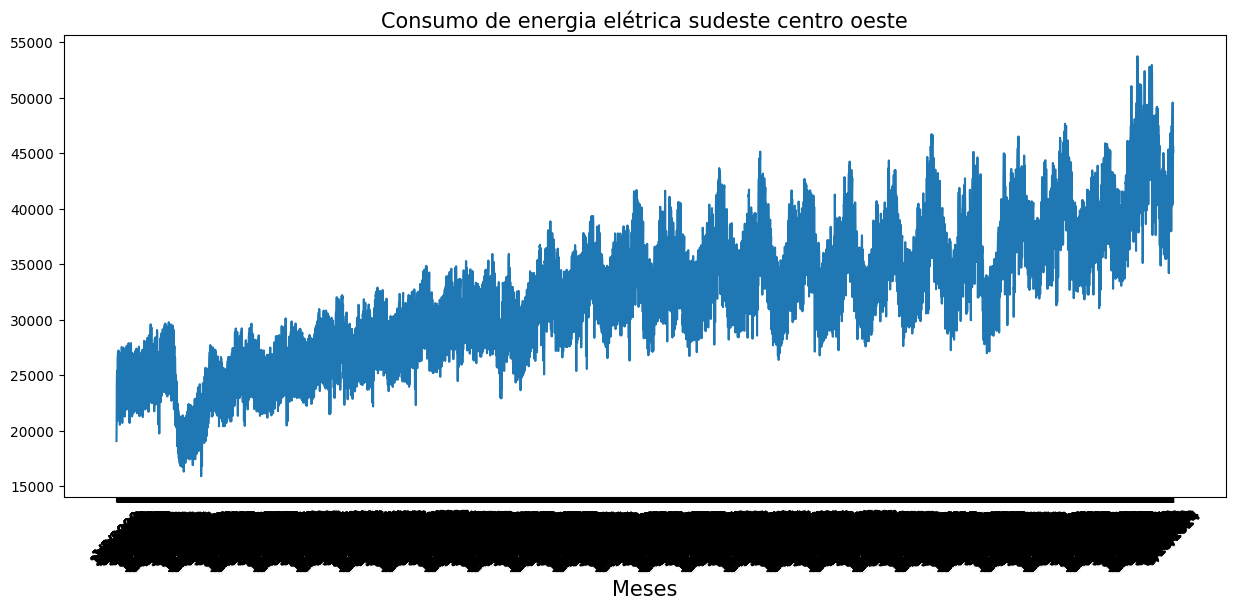

In [62]:
plt.plot(df_sudeste_centro_oeste['din_instante'], df_sudeste_centro_oeste['val_cargaenergiamwmed'])  # Substitua 'data_coluna' e 'consumo' pelos nomes corretos
plt.xlabel('Meses', size=15)
plt.ylabel('')
plt.title('Consumo de energia elétrica sudeste centro oeste', size=15)
plt.xticks(rotation=45)  # Para girar as datas no eixo x, se necessário
plt.show()

In [63]:
df_sudeste_centro_oeste.set_index('din_instante', inplace=True)  # Substitua 'data_coluna' pelo nome da sua coluna de data

In [64]:
stepwise_df_sudeste_centro_oeste=auto_arima(df_sudeste_centro_oeste,start_p=1,start_q=1,max_p=1,max_q=1,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=15.76 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=176828.946, Time=0.27 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=173815.661, Time=2.52 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=7.51 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=176829.467, Time=0.47 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=171445.831, Time=21.02 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=31.55 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=12.22 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=171625.681, Time=3.66 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=34.77 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=170010.671, Time=24.64 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=173769.814, Time=2.31 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=32.52 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=26.61 sec
 ARIMA(0,1,1)(2,1,0)[12] interce

In [65]:
stepwise_df_sudeste_centro_oeste

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [66]:
stepwise_df_sudeste_centro_oeste.aic()

170010.67054235248

In [102]:
df_sudeste_centro_oeste.index = pd.to_datetime(df_sudeste_centro_oeste.index)

In [103]:
print(df_sudeste_centro_oeste.index)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12',
               '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16',
               '2024-09-17', '2024-09-18'],
              dtype='datetime64[ns]', name='din_instante', length=9028, freq=None)


In [104]:
train_df_sudeste_centro_oeste = df_sudeste_centro_oeste.loc['2000-01-01':'2024-09-18']
test_df_sudeste_centro_oeste = df_sudeste_centro_oeste.loc['2024-09-19':]

In [105]:
stepwise_df_sudeste_centro_oeste.fit(train_df_sudeste_centro_oeste)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [106]:
future_forecast_df_sudeste_centro_oeste=stepwise_df_sudeste_centro_oeste.predict(n_periods=30)

In [107]:
future_forecast_df_sudeste_centro_oeste

2024-09-19    44711.958315
2024-09-20    45071.883470
2024-09-21    47631.179494
2024-09-22    46524.587982
2024-09-23    44879.725088
2024-09-24    48423.783244
2024-09-25    48699.383693
2024-09-26    48639.344235
2024-09-27    47921.427428
2024-09-28    49904.531117
2024-09-29    47518.977894
2024-09-30    44457.606300
2024-10-01    45168.978125
2024-10-02    45439.275043
2024-10-03    47674.489751
2024-10-04    47963.710343
2024-10-05    48011.721736
2024-10-06    47340.607423
2024-10-07    45788.067629
2024-10-08    48890.356864
2024-10-09    49034.665624
2024-10-10    51164.200338
2024-10-11    50430.077344
2024-10-12    48959.315487
2024-10-13    46430.677172
2024-10-14    45675.049630
2024-10-15    50743.002093
2024-10-16    51046.052922
2024-10-17    51295.699491
2024-10-18    52112.559660
Freq: D, dtype: float64

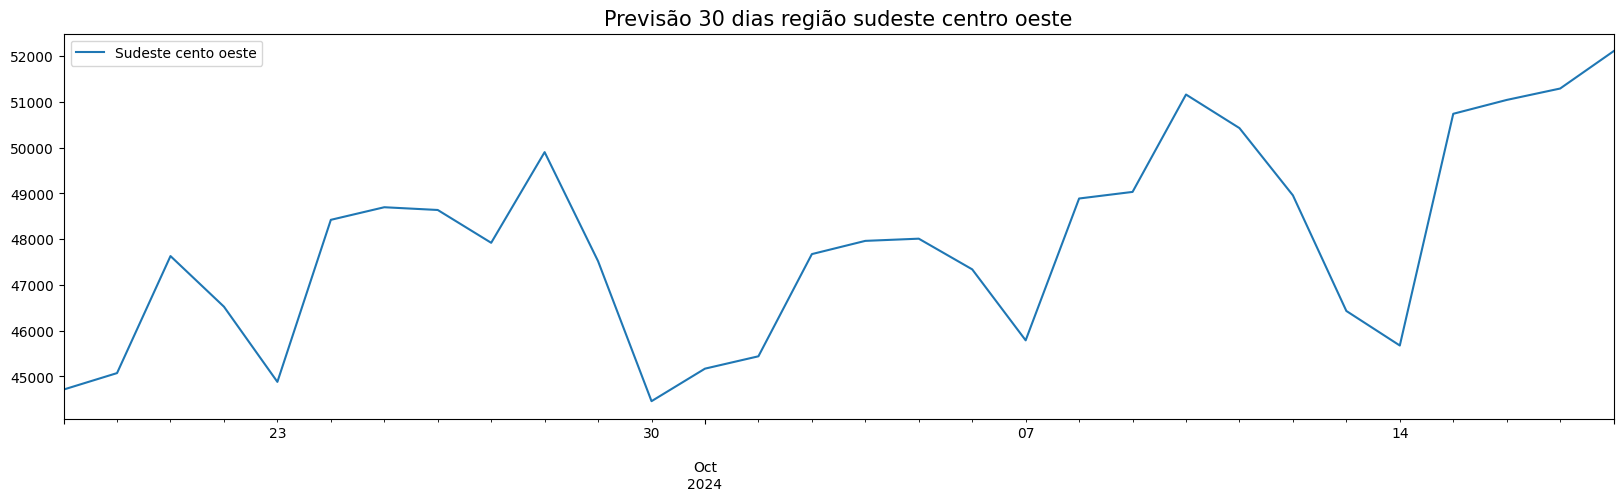

In [87]:
plt.figure(figsize=(20, 5))
future_forecast_df_sudeste_centro_oeste.plot(figsize=(20, 5))
plt.xlabel('')
plt.title('Previsão 30 dias região sudeste centro oeste', size=15)
plt.legend(['Sudeste cento oeste'])  # ajuste a legenda conforme necessário
plt.show()

<Figure size 2000x500 with 0 Axes>

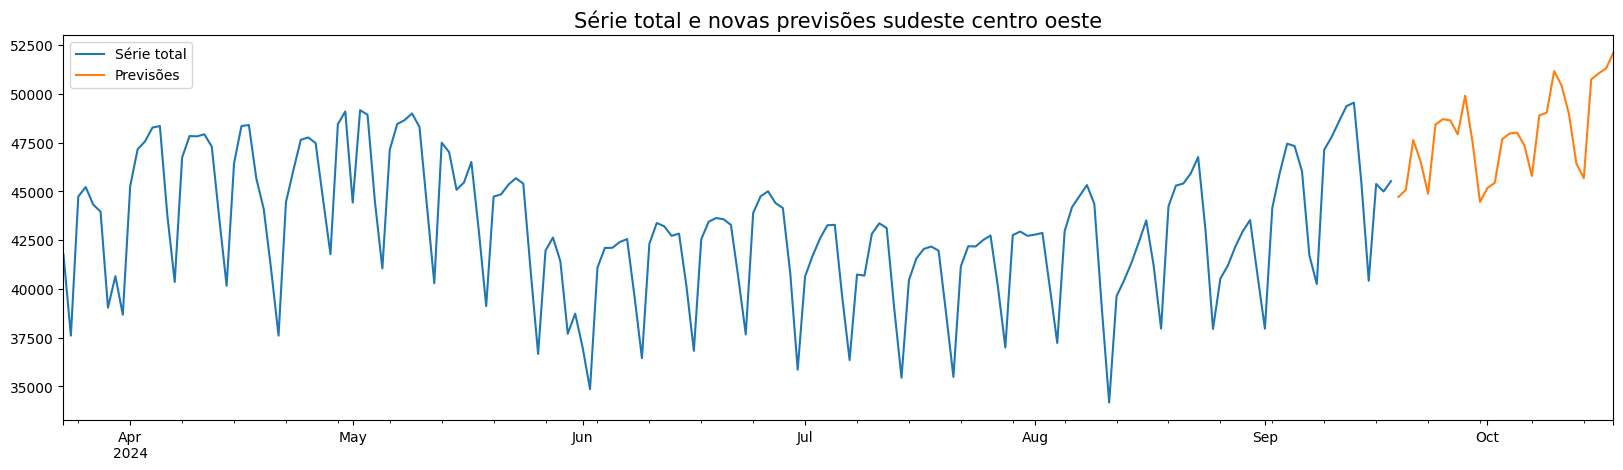

In [110]:
plt.figure(figsize=(20,5))
pd.concat([df_sudeste_centro_oeste[-180:],future_forecast_df_sudeste_centro_oeste],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Série total e novas previsões sudeste centro oeste',size=15)
plt.legend(['Série total','Previsões'], loc='upper left')
plt.show();

TOTALIZADOR

<Figure size 2000x500 with 0 Axes>

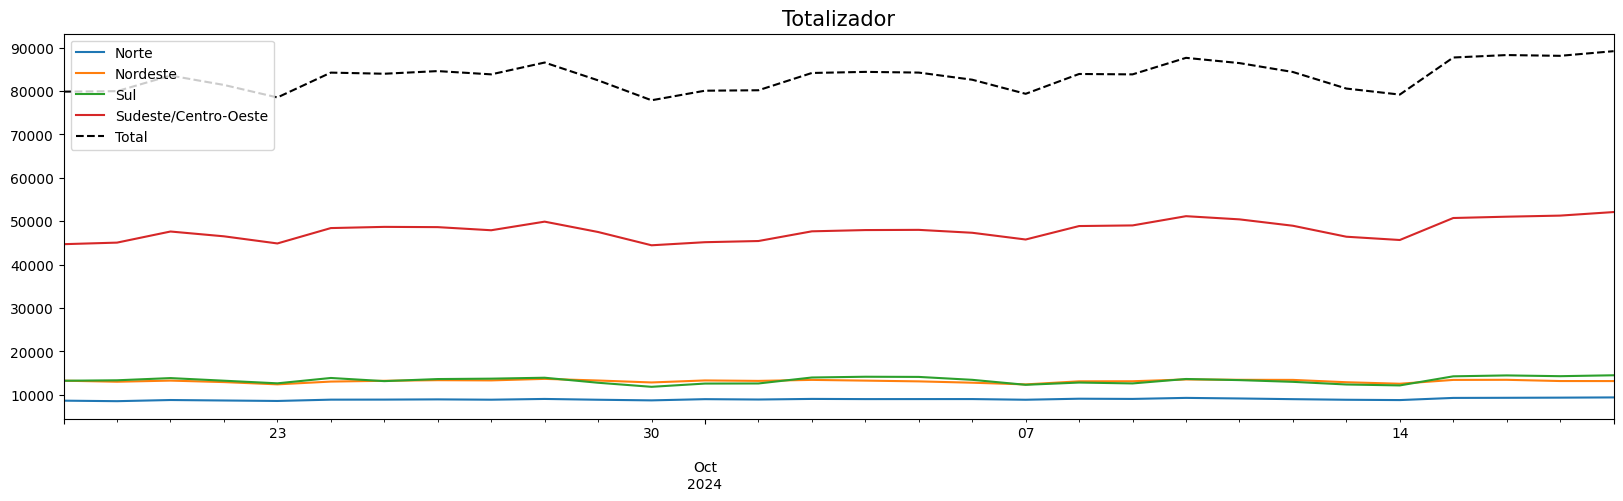

In [107]:
plt.figure(figsize=(20, 5))

# Concatenar os DataFrames
combined_forecast = pd.concat([
    future_forecast_df_norte,
    future_forecast_df_nordeste,
    future_forecast_df_sul,
    future_forecast_df_sudeste_centro_oeste
], axis=1)

# Calcular o somatório
total_forecast = combined_forecast.sum(axis=1).rename('Total')

# Plotar os dados
combined_forecast.plot(figsize=(20, 5))
total_forecast.plot(label='Total', linestyle='--', color='black')  # Linha do total

plt.xlabel('')
plt.title('Totalizador', size=15)
plt.legend(['Norte', 'Nordeste', 'Sul', 'Sudeste/Centro-Oeste', 'Total'], loc='upper left')
plt.show()


SUMÁRIO DOS MODELOS

In [67]:
stepwise_df_norte.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 9028
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood              -60887.366
Date:                             Thu, 26 Sep 2024   AIC                         121782.731
Time:                                     10:37:17   BIC                         121811.158
Sample:                                 01-01-2000   HQIC                        121792.404
                                      - 09-18-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8134      0.005   -162.824      0.000      -0.823      -0.804
ar.S.L12      -0.7376      0.008    -92.249      0.000      -0.753      -0.722
ar.S.L24      -0.5459      0.007    -78.903      0.000      -0.559      -0.532
sigma2      4.299e+04    519.824     82.703      0.000     4.2e+04     4.4e+04
===================================================================================
Ljung-Box (L1) (Q):                 473.49   Jarque-Bera (JB):               629.58
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.99   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
stepwise_df_nordeste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 9028
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood              -69791.397
Date:                             Wed, 25 Sep 2024   AIC                         139590.793
Time:                                     11:18:05   BIC                         139619.220
Sample:                                 01-01-2000   HQIC                        139600.465
                                      - 09-18-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8644      0.005   -180.551      0.000      -0.874      -0.855
ar.S.L12      -0.7310      0.008    -86.231      0.000      -0.748      -0.714
ar.S.L24      -0.5781      0.007    -81.902      0.000      -0.592      -0.564
sigma2      3.097e+05   3277.504     94.489      0.000    3.03e+05    3.16e+05
===================================================================================
Ljung-Box (L1) (Q):                 389.15   Jarque-Bera (JB):              2124.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.69   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
stepwise_df_sul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 9028
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood              -78299.754
Date:                            Wed, 25 Sep 2024   AIC                         156607.509
Time:                                    11:18:23   BIC                         156635.935
Sample:                                01-01-2000   HQIC                        156617.181
                                     - 09-18-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1553      0.020     -7.881      0.000      -0.194      -0.117
ar.S.L12      -0.8427      0.010    -83.066      0.000      -0.863      -0.823
ar.S.L24      -0.4901      0.014    -33.839      0.000      -0.518      -0.462
sigma2      2.048e+06   3.23e+04     63.423      0.000    1.99e+06    2.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   9.50   Jarque-Bera (JB):              1401.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
stepwise_df_sudeste_centro_oeste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 9028
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood              -85001.335
Date:                             Wed, 25 Sep 2024   AIC                         170010.671
Time:                                     11:18:49   BIC                         170039.097
Sample:                                 01-01-2000   HQIC                        170020.343
                                      - 09-18-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8426      0.005   -157.212      0.000      -0.853      -0.832
ar.S.L12      -0.7457      0.009    -79.722      0.000      -0.764      -0.727
ar.S.L24      -0.5992      0.008    -78.090      0.000      -0.614      -0.584
sigma2      9.027e+06    1.5e+05     60.115      0.000    8.73e+06    9.32e+06
===================================================================================
Ljung-Box (L1) (Q):                 499.74   Jarque-Bera (JB):               235.83
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ANÁLISE DOS RESÍDUOS

In [125]:
test_df_sul

,val_cargaenergiamwmed
din_instante,


In [ ]:
print("RMSE do modelo 1: %.3f" % np.sqrt(mean_squared_error(test_df_sul, future_forecast_df_sul)))

In [71]:
erros=pd.DataFrame(np.array(future_forecast_df_norte.values.tolist())-np.array(test_df_norte.values.tolist()))

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.plot(erros,ax=ax[0])


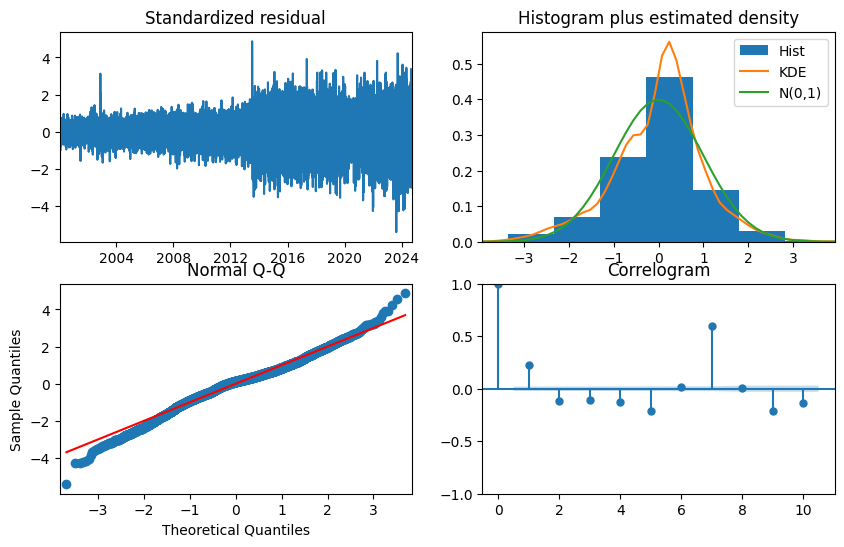

In [74]:
stepwise_df_norte.plot_diagnostics(figsize=(10,6));

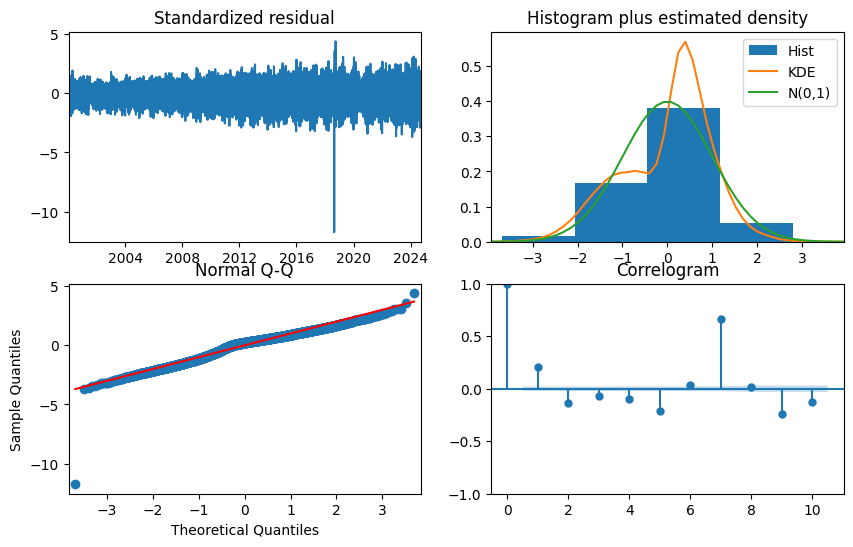

In [75]:
stepwise_df_nordeste.plot_diagnostics(figsize=(10,6));

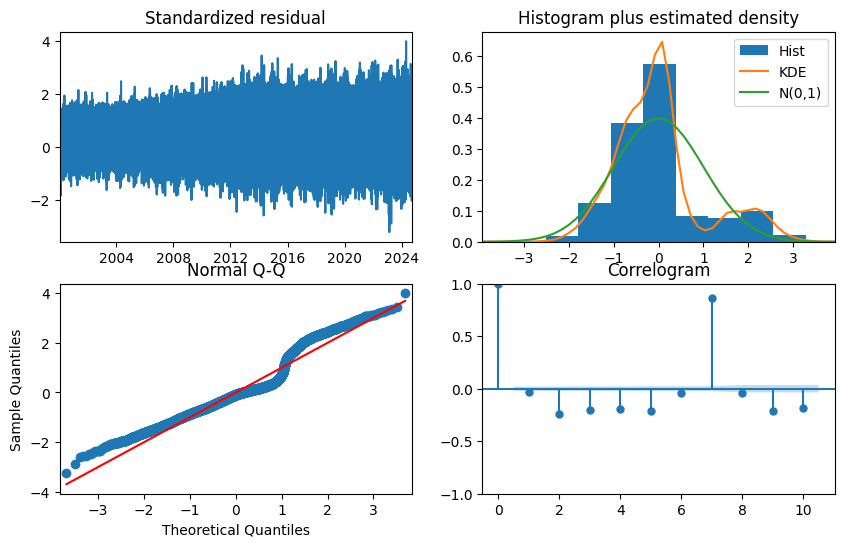

In [76]:
stepwise_df_sul.plot_diagnostics(figsize=(10,6));

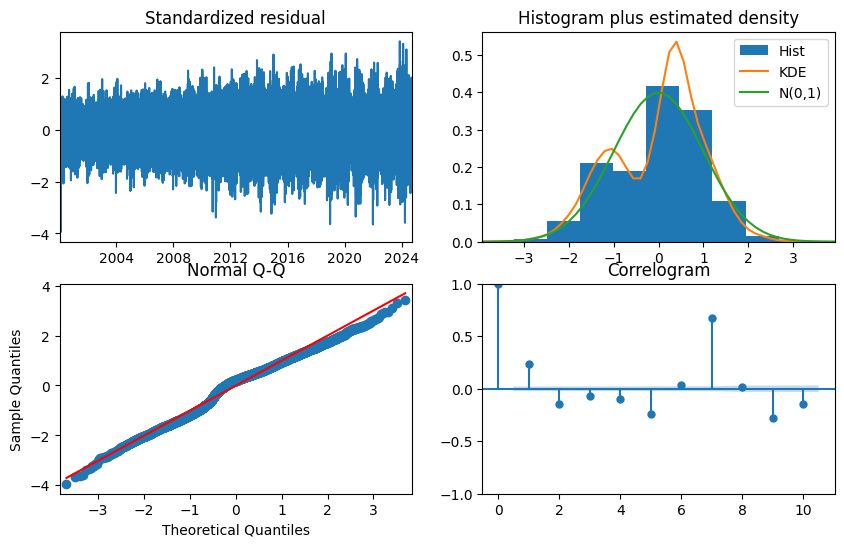

In [77]:
stepwise_df_sudeste_centro_oeste.plot_diagnostics(figsize=(10,6));

In [111]:
df_norte.describe()

,val_cargaenergiamwmed
count,9028.000000
mean,4400.430518
std,1446.502699
min,1852.020833
25%,3249.346250
50%,4086.213750
75%,5454.696375
max,8916.103083


In [112]:
df_nordeste.describe()

,val_cargaenergiamwmed
count,9028.000000
mean,8653.272971
std,2170.312080
min,3904.475000
25%,6796.103541
50%,8637.363170
75%,10322.137615
max,14570.946290


In [113]:
df_sul.describe()

,val_cargaenergiamwmed
count,9028.000000
mean,9528.975611
std,2314.708228
min,4465.691251
25%,7652.589269
50%,9286.596688
75%,11232.438290
max,18150.928290


In [114]:
df_sudeste_centro_oeste.describe()

,val_cargaenergiamwmed
count,9028.000000
mean,33277.237051
std,6091.683904
min,15878.385830
25%,28690.965938
50%,33397.198750
75%,37471.167347
max,53717.617170
